## Лабораторная работа №2
#### Цель
Практическое применение дискретного преобразования Фурье c использованием библиотек Python для анализа речевых сигналов.
#### Задачи

1) Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.

2) Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса

3) Построить сонограмму по записи своего голоса.


#### Выполнение работы



In [136]:
import matplotlib.pyplot as plt
import numpy as np
import more_itertools as m_i
from scipy import signal
from scipy.io import wavfile


In [137]:
rate,signal = wavfile.read('./voice.wav') #считываем сигнал


#### График сигнала:

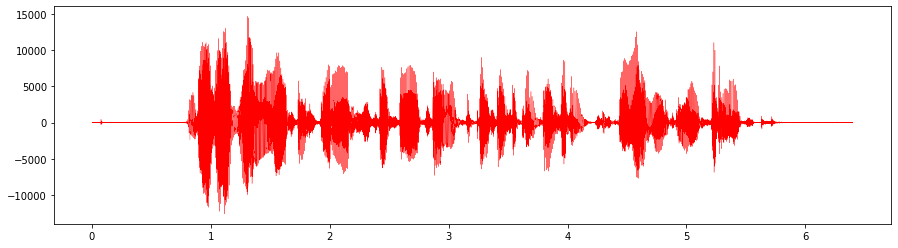

In [138]:
xcoords=np.linspace(0,signal.shape[0]/rate,signal.shape[0])
plt.figure(figsize=(15,4))
plt.plot(xcoords, signal,
        linestyle = '-',
        linewidth = 0.3,
        color = 'red')
plt.show()

#### 1. Построение траектории основного тона (F0) на записи своего голоса

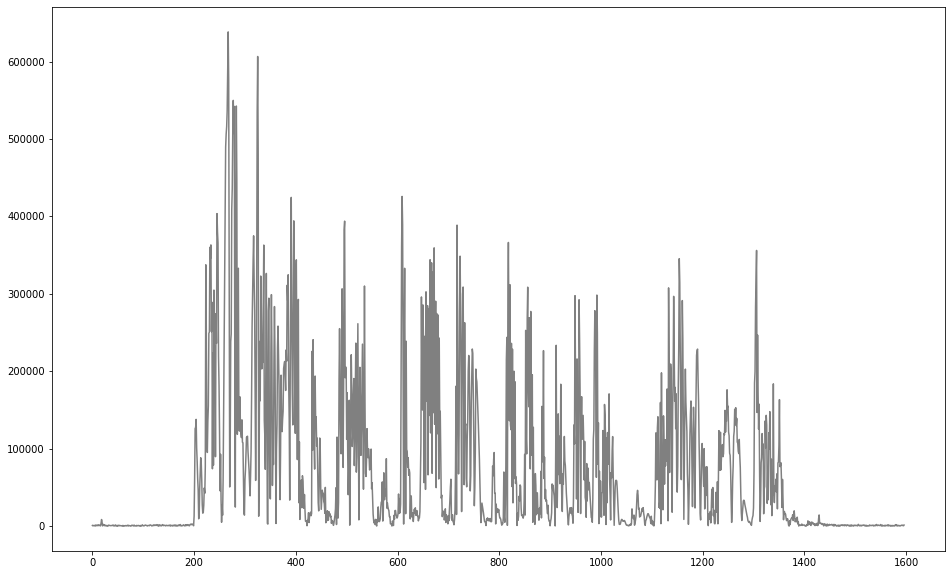

In [139]:
N = 256
sets = list(m_i.windowed(signal, n=N, step=int(N/4)))
for i in range(len(sets)):
    sets[i] = sets[i]*np.hamming(len(sets[i]))

def DFT(x):
    n = np.arange(len(x))
    k = n.reshape((len(x), 1))
    e = np.exp(-2j * np.pi * k * n / len(x))
    return(np.dot(e,x))
dft_sets = []
for i in sets:
    dft_sets.append(DFT(i))
ampl_spec = [(sum([j**2 for j in i[:int(len(i)/2)]])**(1/2)).real for i in dft_sets]
plt.figure(figsize=(16, 10))
plt.plot(ampl_spec,color='gray')

Форманта F0:

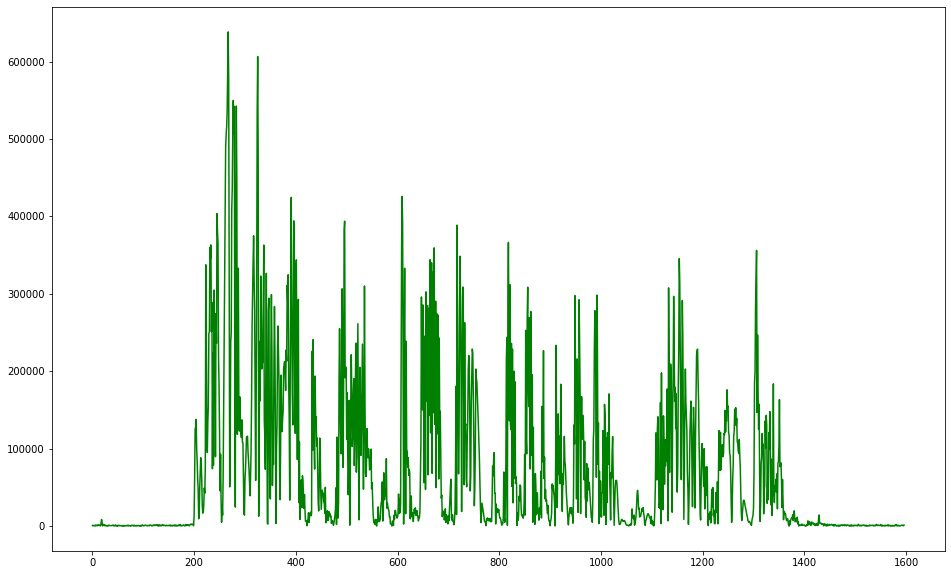

In [140]:
fragments=[]
for i in range(0,len(ampl_spec),int(rate/N)):
    fragments.append(np.array(ampl_spec[i:i+int(rate/N)]))
    
F0=[]
for i in fragments:
    if i.max()>2*i.mean():
        F0+=(i.tolist())
    else:
        F0+=np.zeros(len(i)).tolist()
plt.figure(figsize=(16, 10))
plt.plot(F0,color='green')

#### Построение траектории второй, третьей и четвертой формантных частот на записи своего голоса

In [141]:
def fNformant(n,F0):
    res=[]
    if(F0[0]>n*max(F0[0],F0[1])):
        res+=[max(F0[0],F0[1])]
    else:
        res+=[0]
    for i in range(1,int(len(F0)/n)):
        m = max([F0[n*i],F0[n*i+1],F0[n*i-1]])
        if(F0[i]>n*m):
            res+=[m]
        else:
            res+=[0]
    return res

In [142]:
F1=fNformant(2,F0)
F2=fNformant(3,F0)
F3=fNformant(4,F0)

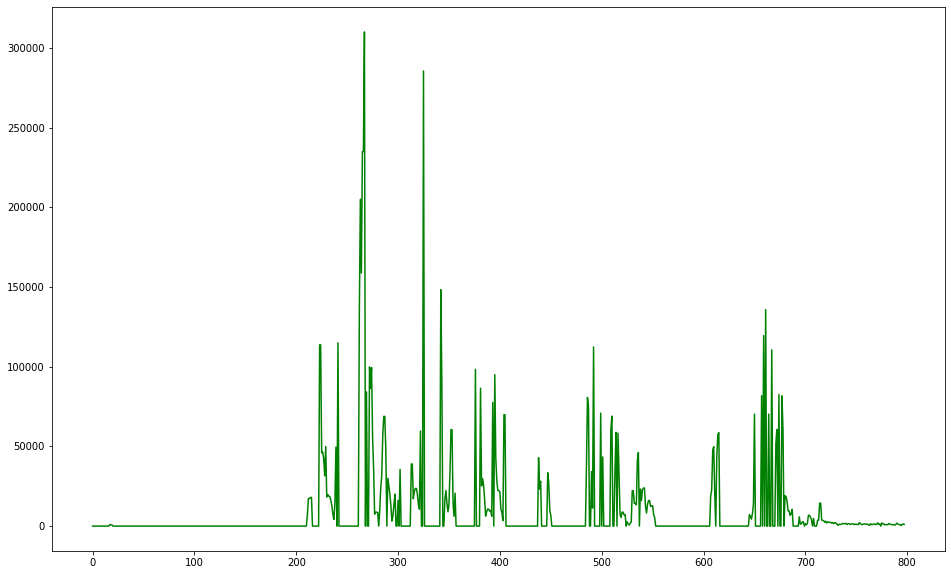

In [143]:
plt.figure(figsize=(16, 10))

plt.plot(F1,color='green')#вторая форманта

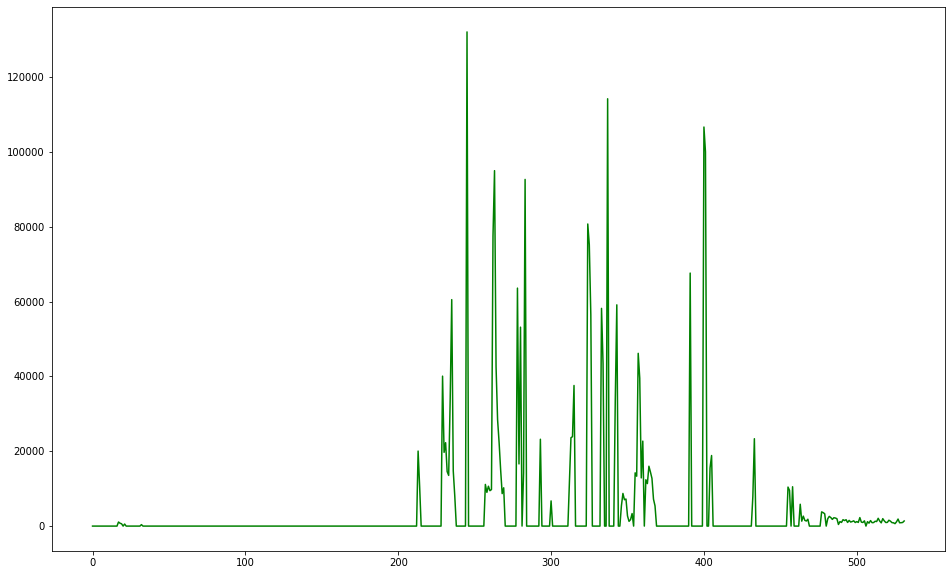

In [144]:
plt.figure(figsize=(16, 10))

plt.plot(F2,color='green')#третья форманта

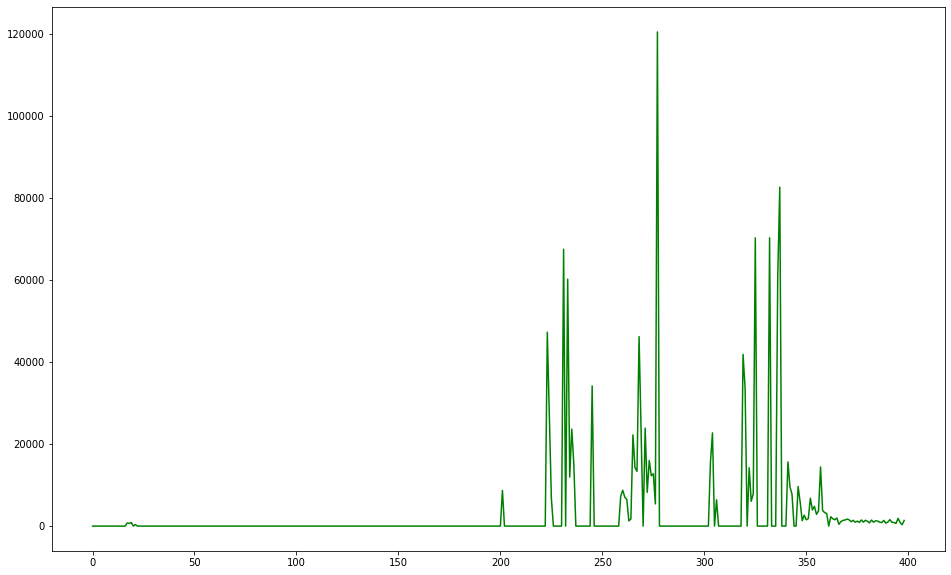

In [145]:
plt.figure(figsize=(16, 10))

plt.plot(F3,color='green')#четвертая форманта

#### Построение сонограммы по записи своего голоса.

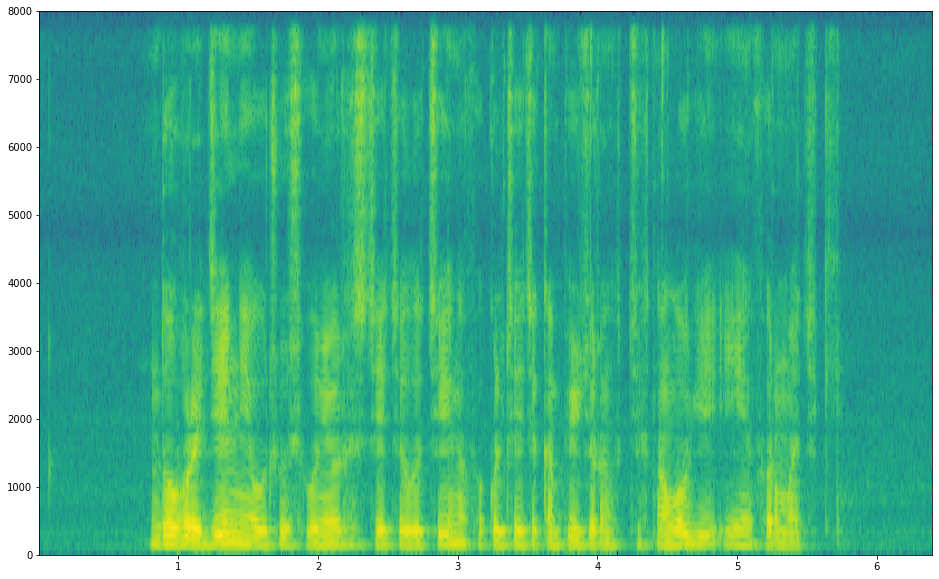

In [146]:
plt.figure(figsize=(16, 10))

plt.specgram(signal,NFFT=N, pad_to=N, Fs=rate)
plt.show()

#### Вывод
В ходе выполнения лабораторной работы была построена траектория основного тона, траектории для второй, третьей и четвертой формантных частот, сонограмма. 